In [2]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━╸━━━━━━━━━━━━━━━╸━━━━━━   0.0 B /  ??.?MB @ 

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")


In [6]:
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())

        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [23]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
!pip install html5lib
!pip install lxml



In [25]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [26]:
data=requests.get(url).text
print(data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [27]:
#data parsing using Beautiful Soup
soup = BeautifulSoup(data, 'lxml')


In [28]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [31]:
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
    
tesla_revenue.tail()

,Date,Revenue
157,2010-06-30,$28
158,2010-03-31,$21
159,2009-12-31,
160,2009-09-30,$46
161,2009-06-30,$27


In [33]:
#GME using Yfinance
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-22,14.500000,15.160000,14.300000,14.900000,3606500,0.0,0.0
2024-01-23,15.000000,15.020000,14.050000,14.180000,3495300,0.0,0.0
2024-01-24,14.280000,14.380000,13.820000,13.950000,2513800,0.0,0.0


In [36]:
#getting GME data using webscraping
gmeurl= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html."

In [37]:
gmedata=requests.get(gmeurl).text
print(gmedata)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Resource>/cf-courses-data/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html.</Resource><RequestId>77568454-1e47-45d9-b32a-4934fa51323e</RequestId><httpStatusCode>404</httpStatusCode></Error>


In [46]:
#data parsing using Beautiful Soup
gmesoup = BeautifulSoup(gmedata, 'lxml')
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
gme_revenue


,Date,Revenue


In [47]:
for row in gmesoup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
    
gme_revenue.tail()
    

IndexError: list index out of range

In [51]:
#Q5.Make graph TESLA
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [52]:
def make_graph(tesla_data, tesla_revenue, 'Tesla'):


SyntaxError: invalid syntax (64949713.py, line 1)

ValueError: x and y must have same first dimension, but have shapes (3418,) and (162,)

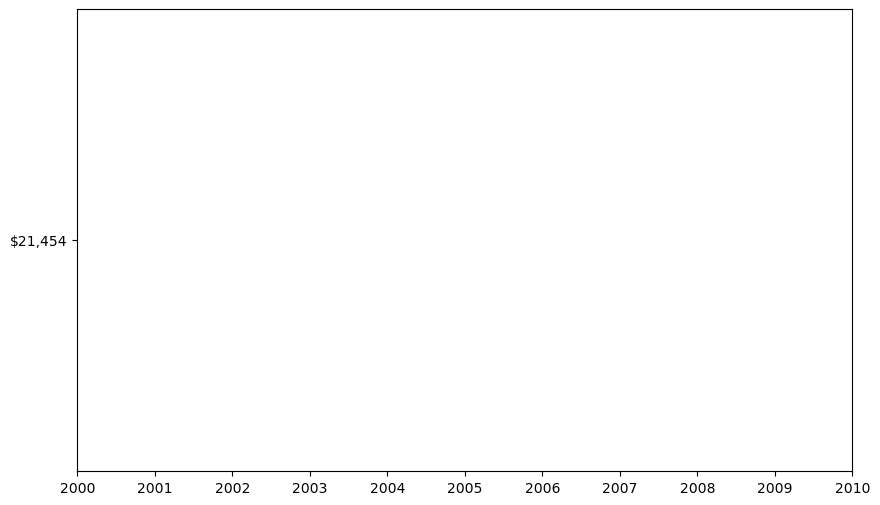

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(data, revenue, company_name):
    # Convert the 'Date' column to datetime format if it's not already
    data['Date'] = pd.to_datetime(data['Date'])

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], revenue['Revenue'], label=company_name, marker='o', linestyle='-')

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.title(f'{company_name} Revenue Over Time')
    plt.legend()
    plt.grid(True)
    
    # Display the graph
    plt.show()

# Assuming 'tesla_data' and 'tesla_revenue' are DataFrames with 'Date' and 'Revenue' columns
make_graph(tesla_data, tesla_revenue, 'Tesla')


In [54]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(data, revenue, company_name):
    # Convert the 'Date' column to datetime format if it's not already
    data['Date'] = pd.to_datetime(data['Date'])

    # Check if the lengths of 'Date' and 'Revenue' are the same
    if len(data['Date']) != len(revenue['Revenue']):
        raise ValueError("Lengths of 'Date' and 'Revenue' arrays are different.")

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], revenue['Revenue'], label=company_name, marker='o', linestyle='-')

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.title(f'{company_name} Revenue Over Time')
    plt.legend()
    plt.grid(True)
    
    # Display the graph
    plt.show()

# Assuming 'tesla_data' and 'tesla_revenue' are DataFrames with 'Date' and 'Revenue' columns
make_graph(tesla_data, tesla_revenue, 'Tesla')


ValueError: Lengths of 'Date' and 'Revenue' arrays are different.